In [1]:
# Colin Glory 4/10/2024

In [2]:
# Kaggle: 

# Purpose: Intent to use logistic regression to predict Class based on the other features

# Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Importing dataset and assigning it
df = pd.read_csv('breast_cancer.csv')

In [4]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [12]:
# Only two types in class: Benign(2): Not likely to get cancer, Malignant(4): Likely to get cancer
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [14]:
# check the percentage of nulls present in each column
num_null = df.isnull().sum() / df.shape[0] * 100
num_null.round(2)

Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [ ]:
## Data Analysis

In [13]:
# Checking types of Data
df.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [15]:
# Taking a look at each columns unique points
df['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [17]:
df['Uniformity of Cell Size'].unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

In [18]:
df['Uniformity of Cell Shape'].unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64)

In [19]:
df['Marginal Adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

In [20]:
df['Single Epithelial Cell Size'].unique()

array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9], dtype=int64)

In [21]:
df['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [22]:
df['Bland Chromatin'].unique()

array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10], dtype=int64)

In [23]:
df['Normal Nucleoli'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64)

In [24]:
df['Mitoses'].unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

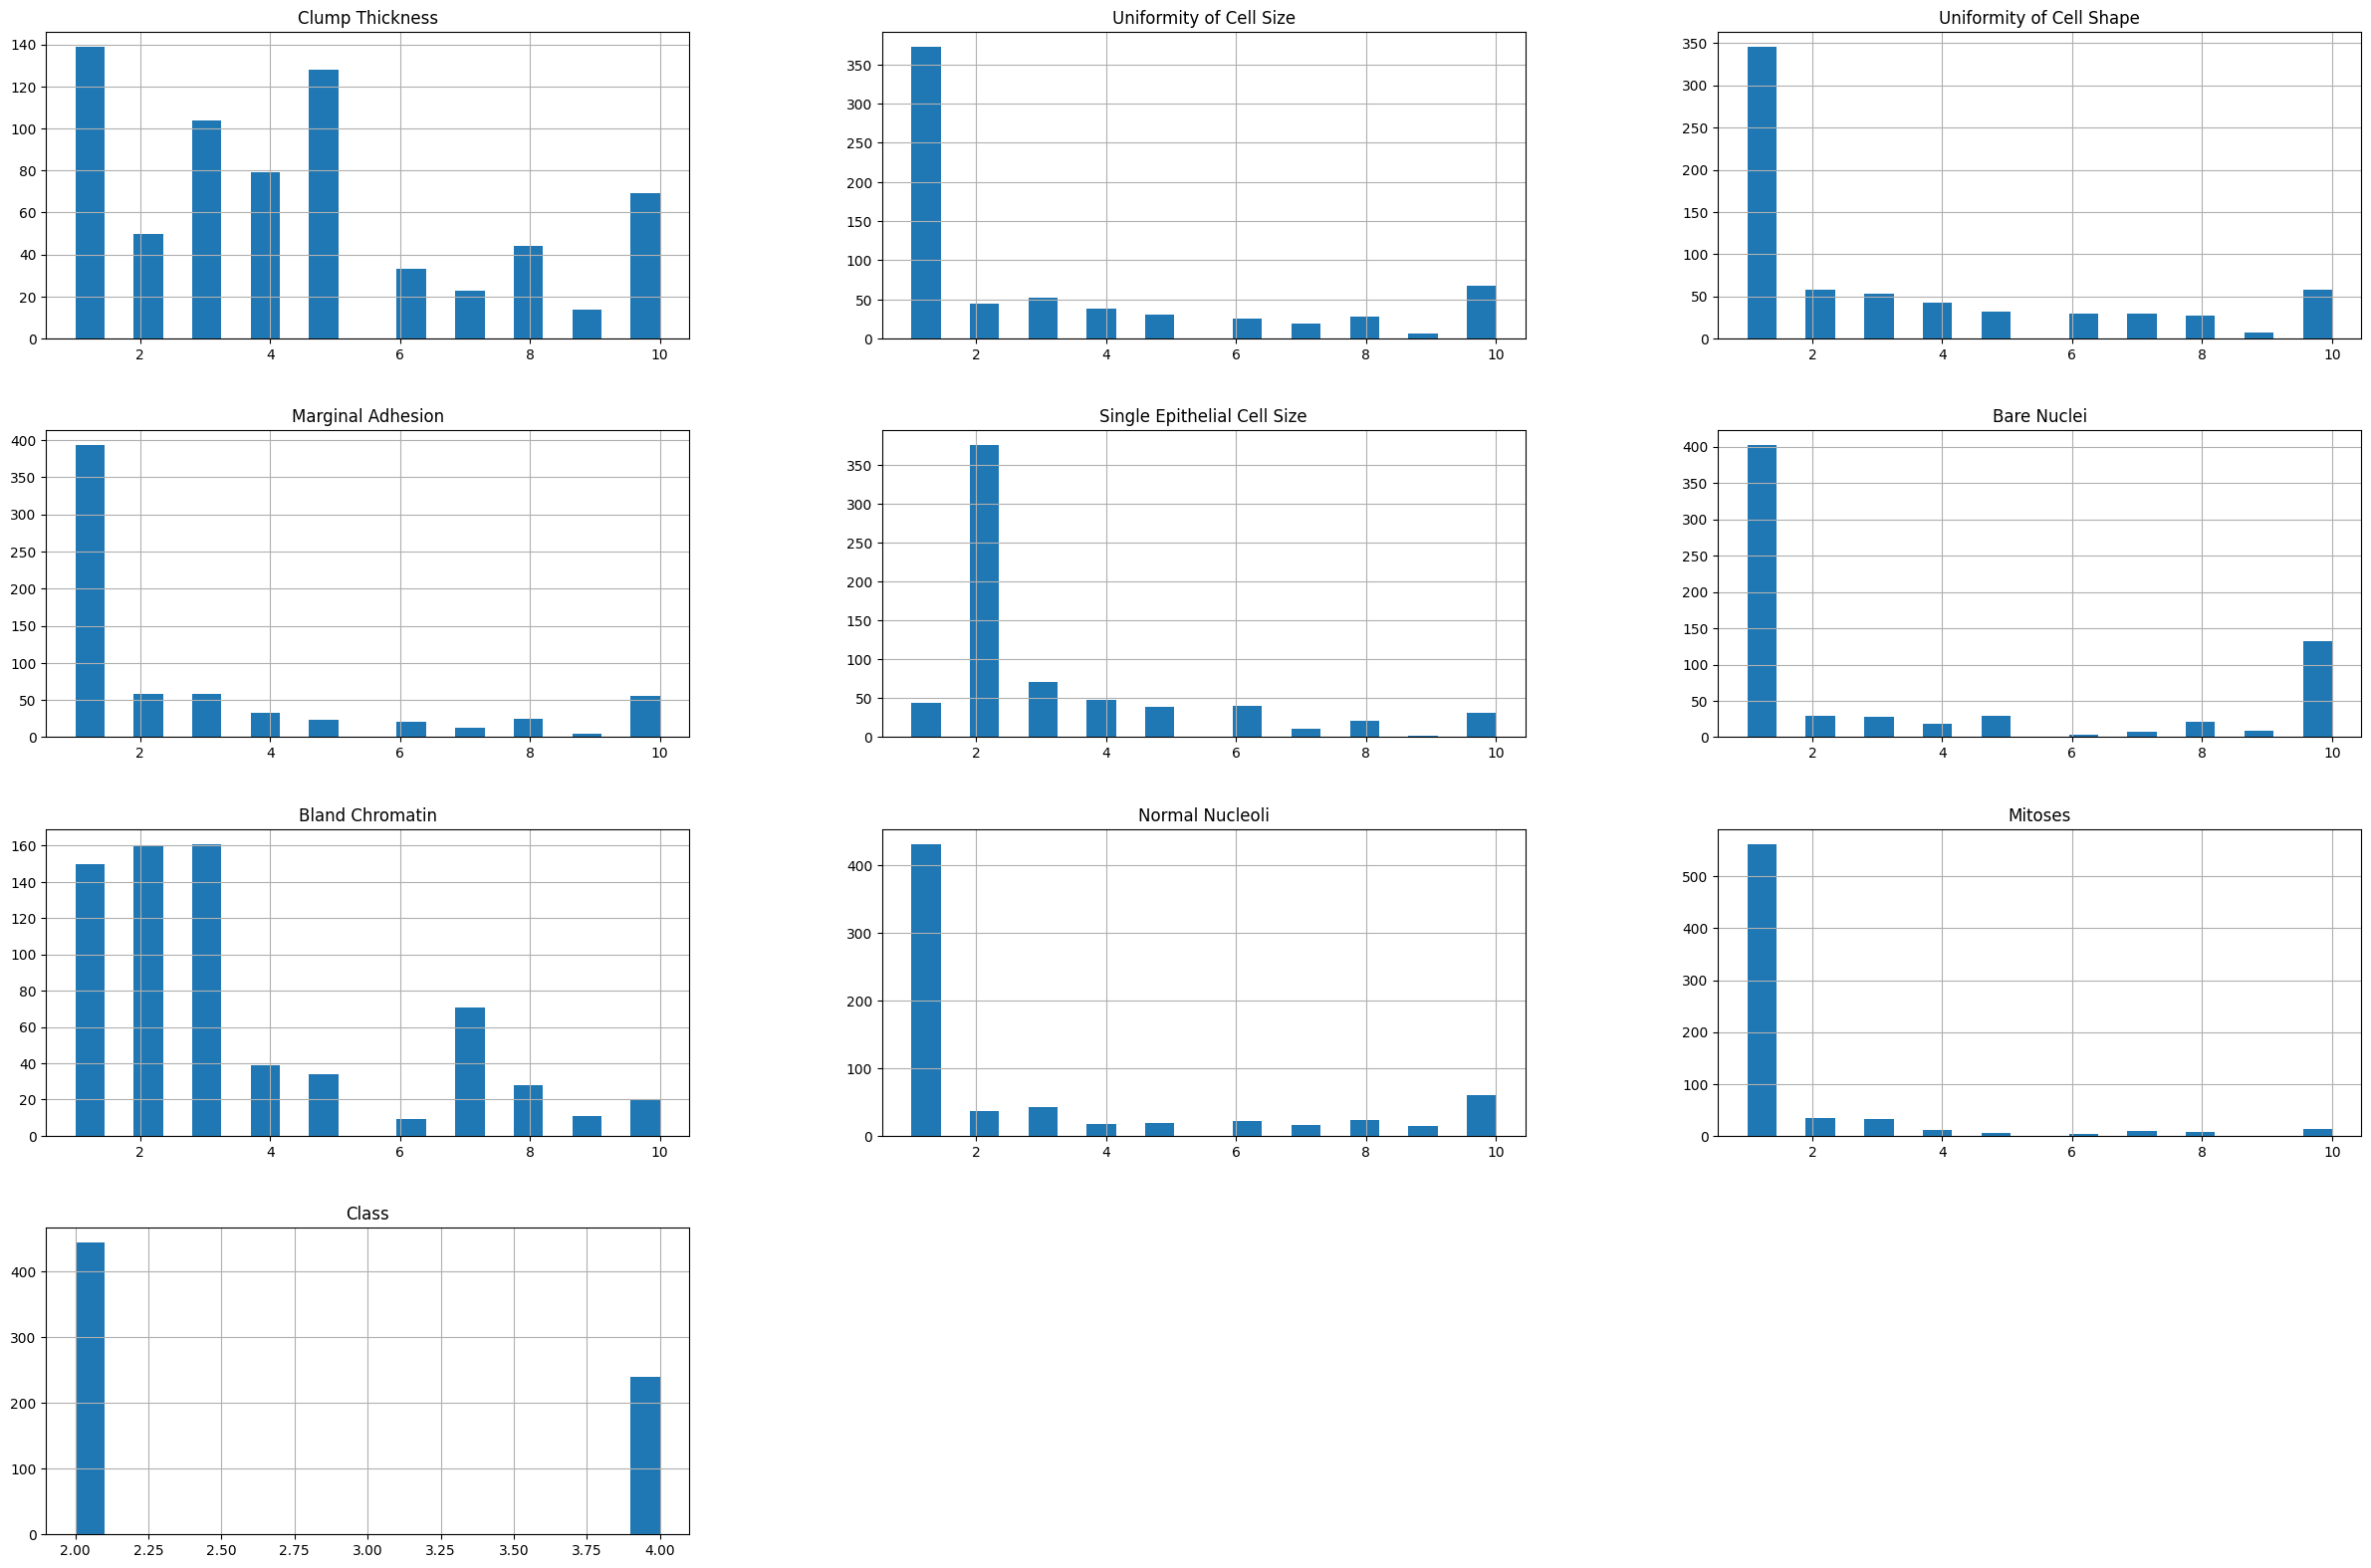

In [25]:
# Histogram of all features
df.hist(bins=20, figsize=(30,30), layout=(6,3));

In [26]:
# Correlation Analysis
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


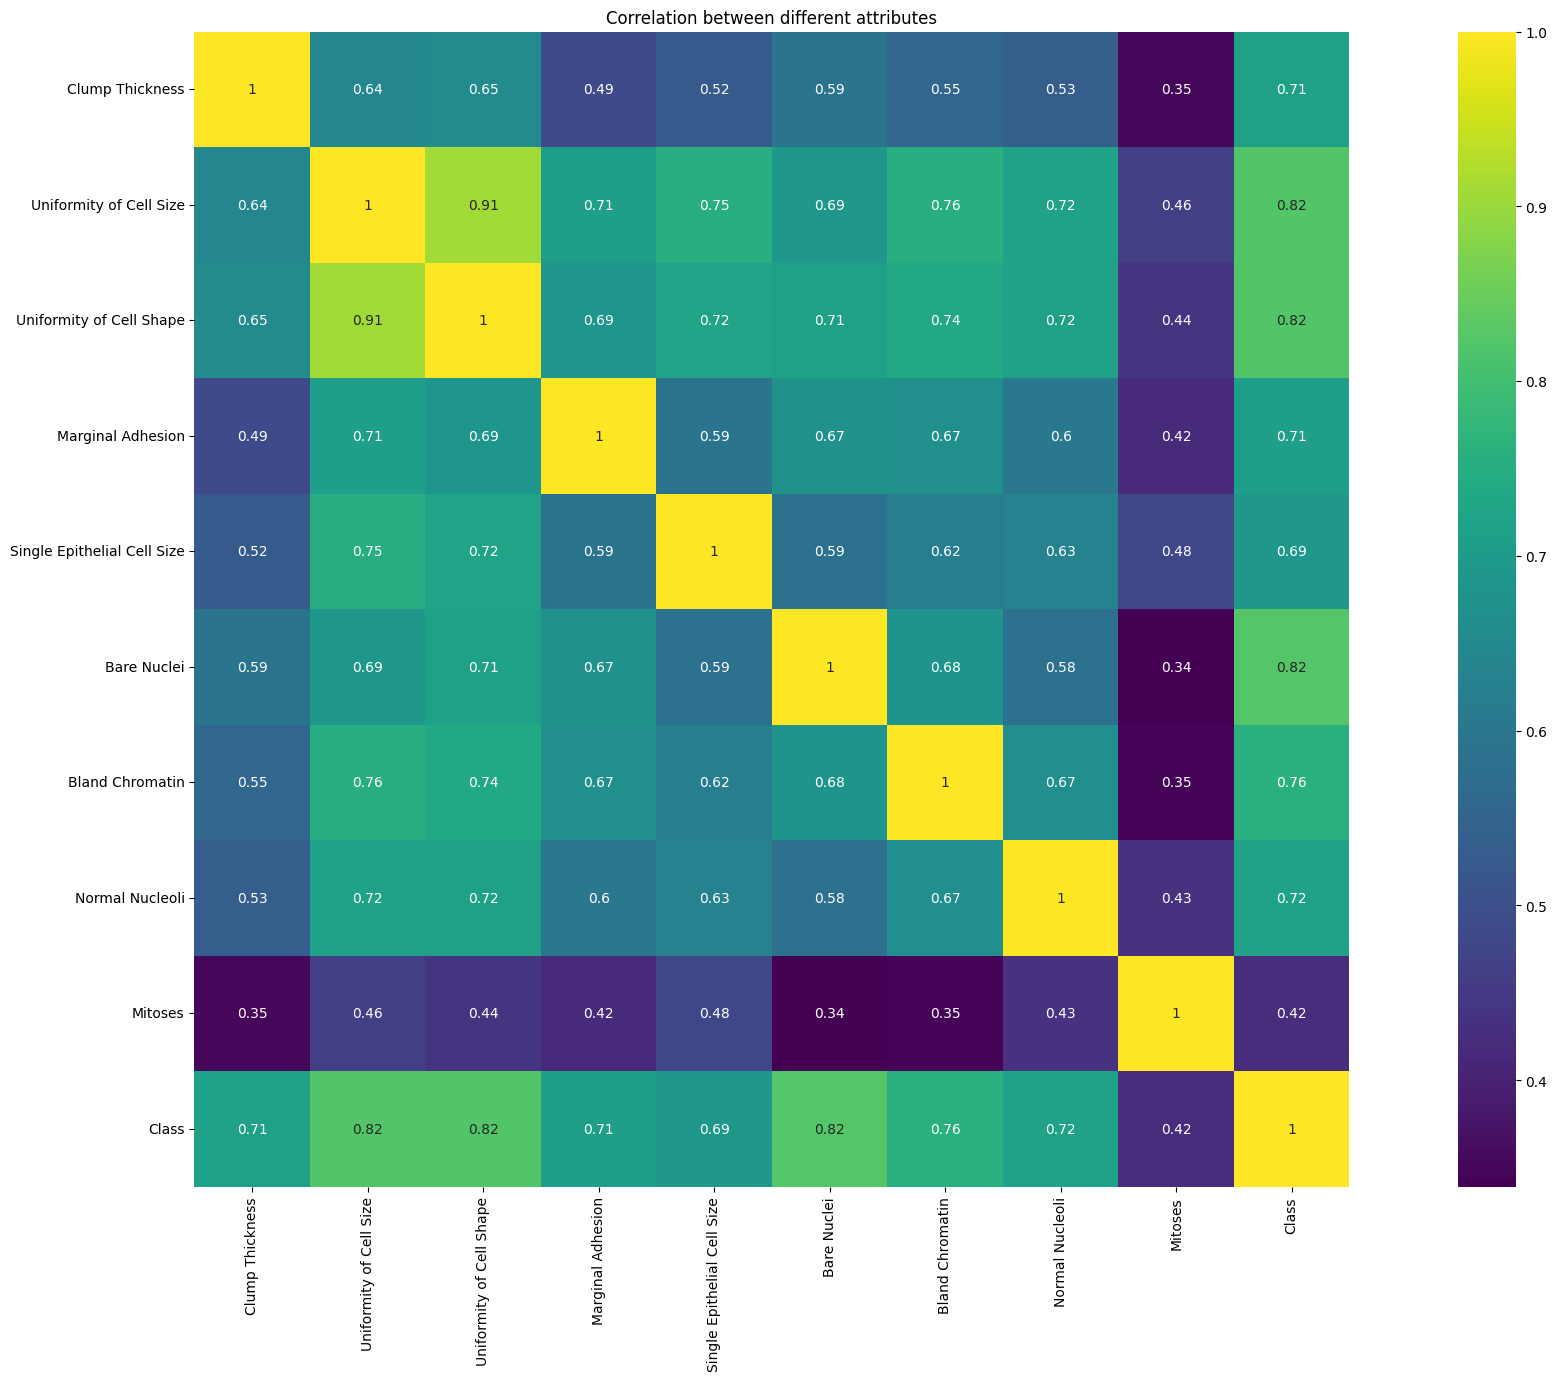

In [27]:
# Correlation Heat Map
plt.figure(figsize=(28,15))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()


In [28]:
## Logistic Regression

In [33]:
# Test and training data
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [34]:
# Initializing logistic regression
model = LogisticRegression(solver='liblinear', random_state=0)

In [35]:
# Training the data
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
# Predicts the class
predictions = model.predict(x_test)

In [40]:
difference = abs(predictions - y_test)
difference.mean()

0.06829268292682927

In [41]:
# Classification Report

In [42]:
from sklearn.metrics import classification_report

# Compute the classification report
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       133
           4       0.95      0.96      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [43]:
# Pickle

In [45]:
import pickle
pickle.dump(model , open('classification.pk1' , 'wb'))